# Proyecto 4: Informe final de carrera

## Objetivo: Profundizar y/o ajustar la resolución de alguno de los 3 proyectos realizados

El presente proyecto tiene el objetivo de ajustar la resolución del proyecto número 3, donde se busca tener una predicción mas acercada a la realidad minimizando el error y siguiendo la tendencia de la serie

Para poder realizar lo anterior al igual que el proyecto 3 trabajaremos con los datasets de las estaciones de peaje en la Ciudad de Buenos Aires, Argentina entre los años 2017 - 2020.

**Los dataset se pueden descargar [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa).
En este caso se trabajó con los años 2017, 2018, 2019 y también con 2020 que resulta un año peculiar, debido a la situación vivida por la pandemia mundial derivado del virus Covid-19.**

**El contenido y resultados del proyecto 3 se pueden ver [aquí](https://github.com/jarenasz/Series-de-tiempo-Forescasting/blob/main/DS_Proyecto_03_ST%20(Github).ipynb)**

## Preparación de dataset

Importamos la librerías a ocupar inicialmente

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

Importamos los dataset con los que trabajaremos y observamos los datos de estos

In [2]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
print(data_2020.shape)
print(data_2020.info())
data_2020.head()

(2533743, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB
None


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [4]:
print(data_2019.shape)
print(data_2019.info())
data_2019.head()

(812153, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB
None


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [5]:
print(data_2018.shape)
print(data_2018.info())
data_2018.head()

(1375908, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB
None


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [6]:
print(data_2017.shape)
print(data_2017.info())
data_2017.head()

(1372645, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB
None


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Podemos observar que el dataset del año 2020 contiene 3 columnas mas que los dataset de los años 2017, 2018 y 2019, a continuación veremos que tipo de valores tienen estas columnas adicionales:

In [7]:
print("Columna Mes\n",data_2020.mes.unique(),"\n")
print("Columna dia_fecha\n",data_2020.dia_fecha.unique(),"\n")
print("Columna observacion\n",data_2020.observacion.unique(),"\n")

Columna Mes
 ['enero' 'febrero' 'marzo' 'abril' 'mayo' 'junio' 'julio' 'agosto'
 'septiembre' 'octubre' 'noviembre' 'diciembre'] 

Columna dia_fecha
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.] 

Columna observacion
 ['Efectivo' 'Paso en Infracción' 'Paso en infracción con Multa LPR'
 'T.Magnética Disc.' 'Tag - PosPago' 'Tag - PosPago OCR' 'Tag - PrePago'
 'Exento - Reglamento' 'Tag - PrePago OCR' 'Violación - Normal'
 'Exento - Otros motivos' 'Exento - Demora en cobro'
 'Violación - Via Liberada' 'Violación - Rebote' 'Violación - Repetitiva'
 'Paso a facturar - (colectivo)' 'Metrobus no hab. TAG pospago'
 'Violación - Vía Cerrada' 'Paso en Infracción con Multa' 'Obs CPP'
 'Metrobus no hab. OCR pospago' 'Metrobus no hab. TAG prepago'
 'Metrobus no hab. OCR prepago' 'Tag - Exento' 'Mercado Pago'
 'Mercado Pago OCR' 'Metrobus no hab. TAG Mercado Pago'] 



Dado que tenemos un antecedente procederemos a borrar las columnas adicionales en el dataset del año 2020 y homologaremos el tipo de dato en las columnas númericas para generar un dataset con datos del mismo tipo

In [8]:
data_2020.drop(columns=["mes","dia_fecha","observacion"],inplace=True)
data_2020[["periodo","hora_fin","cantidad_pasos"]]=data_2020[["periodo","hora_fin", "cantidad_pasos"]].astype(int)
data_2020.head()

,periodo,fecha,dia,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos
0,2020,2020-01-01 00:00:00,Miércoles,0.0,1,ALBERDI,Auto,Efectivo,Centro,24
1,2020,2020-01-01 00:00:00,Miércoles,0.0,1,ALBERDI,Auto,Efectivo,Provincia,80
2,2020,2020-01-01 00:00:00,Miércoles,0.0,1,ALBERDI,Auto,Rec.Deuda,Provincia,1
3,2020,2020-01-01 00:00:00,Miércoles,0.0,1,ALBERDI,Auto,Rec.Deuda,Centro,1
4,2020,2020-01-01 00:00:00,Miércoles,0.0,1,ALBERDI,Auto,Rec.Deuda,Provincia,1


A continuación observaremos valores de columnas de interés

In [9]:
print(data_2020['estacion'].unique(),"\n")
print(data_2019['estacion'].unique(),"\n")
print(data_2018['estacion'].unique(),"\n")
print(data_2017['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2'] 

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB'] 

['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento'] 

['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [10]:
print(data_2020['sentido'].unique(),"\n")
print(data_2019['sentido'].unique(),"\n")
print(data_2018['sentido'].unique(),"\n")
print(data_2017['sentido'].unique())

['Centro' 'Provincia'] 

['Centro' 'Provincia'] 

['Centro' 'Provincia'] 

['Centro' 'Provincia']


In [11]:
print(data_2020['tipo_vehiculo'].unique(),"\n")
print(data_2019['tipo_vehiculo'].unique(),"\n")
print(data_2018['tipo_vehiculo'].unique(),"\n")
print(data_2017['tipo_vehiculo'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes'] 

['Liviano' 'Pesado'] 

['Liviano' 'Pesado'] 

['Liviano' 'Pesado']


In [12]:
print(data_2020['forma_pago'].unique(),"\n")
print(data_2019['forma_pago'].unique(),"\n")
print(data_2018['forma_pago'].unique(),"\n")
print(data_2017['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago'] 

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD'] 

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION'] 

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


In [13]:
#Observando los valores unificaremos el tipo de datos de las columnas forma_pago y estación
data_2020.forma_pago=data_2020.forma_pago.str.upper()
data_2020.estacion=data_2020.estacion.str.capitalize()

Podemos ver que el dataset del año 2020 contiene valores adcionales o diferentes en algunas columnas, por lo que unificaremos valores, pero primero uniremos los dataset en 1 solo

In [14]:
data=pd.concat([data_2020, data_2019, data_2018, data_2017])
data

,periodo,fecha,dia,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos
0,2020,2020-01-01 00:00:00,Miércoles,0.0,1,Alberdi,Auto,EFECTIVO,Centro,24
1,2020,2020-01-01 00:00:00,Miércoles,0.0,1,Alberdi,Auto,EFECTIVO,Provincia,80
2,2020,2020-01-01 00:00:00,Miércoles,0.0,1,Alberdi,Auto,REC.DEUDA,Provincia,1
3,2020,2020-01-01 00:00:00,Miércoles,0.0,1,Alberdi,Auto,REC.DEUDA,Centro,1
4,2020,2020-01-01 00:00:00,Miércoles,0.0,1,Alberdi,Auto,REC.DEUDA,Provincia,1
...,...,...,...,...,...,...,...,...,...,...
1372640,2017,2017-12-31,Domingo,22.0,23,Sarmiento,Liviano,NO COBRADO,Provincia,3
1372641,2017,2017-12-31,Domingo,22.0,23,Sarmiento,Liviano,TELEPASE,Provincia,10
1372642,2017,2017-12-31,Domingo,22.0,23,Sarmiento,Pesado,TELEPASE,Provincia,1
1372643,2017,2017-12-31,Domingo,23.0,0,Sarmiento,Liviano,NO COBRADO,Provincia,1


Unificaremos algunos valores para tener menos categorias dentro de las columnas estación, tipo_vehículo y forma_pago

In [15]:
#antes observamos si el dataset cuenta con datos faltantes
data.isna().sum()

periodo           0
fecha             0
dia               0
hora_inicio       0
hora_fin          0
estacion          0
tipo_vehiculo     0
forma_pago        0
sentido           0
cantidad_pasos    0
dtype: int64

In [16]:
data.estacion=data.estacion.replace({"Alberti":"Alberdi", "Dellepiane Centro": "Dellepiane",
                                           "Dellepiane Liniers": "Dellepiane","Dellepiane linierslepiane centro": "Dellepiane",
                                          "Dellepiane liniers": "Dellepiane"}) 

In [17]:
data.tipo_vehiculo=data.tipo_vehiculo.replace({"Auto":"Liviano", "Moto":"Liviano", "Pago Doble Auto":"Liviano", "Pago doble Moto":"Liviano", 
                                               "Auto con trailer":"Liviano","Pago Doble Auto con trailer / Pesado 2 Ejes":"Pesado",
                                               "Pesados 2 Ejes":"Pesado", "Pesados 3 Ejes":"Pesado","Pesados 4 Ejes":"Pesado",
                                               "Pesados 5 Ejes":"Pesado", "Pesados 6 Ejes": "Pesado" }) 

In [18]:
data.forma_pago=data.forma_pago.replace({"T. DISCAPACIDAD":"TARJETA DISCAPACIDAD", "MERCADO PAGO": "TELEPASE",
                                              "TAG": "TELEPASE", "VIOLACIÓN":"INFRACCION", "TARJETA MAGNÉTICA": "TARJETA DISCAPACIDAD" }) 

In [19]:
print(data["estacion"].unique(),"\n")
print(data["tipo_vehiculo"].unique(),"\n")
print(data["forma_pago"].unique(),"\n")

['Alberdi' 'Avellaneda' 'Dellepiane' 'Illia' 'Ilp' 'Pb1' 'Pb3' 'Pb4'
 'Retiro' 'Salguero' 'Sarmiento' 'Pb2' 'PDB'] 

['Liviano' 'N/D' 'Pesado'] 

['EFECTIVO' 'REC.DEUDA' 'TARJETA DISCAPACIDAD' 'TELEPASE' 'EXENTO'
 'INFRACCION' 'CPP' 'NO COBRADO' 'MONEDERO' 'Otros'] 



In [20]:
#Construiremos el dataset con el que realizaremos el EDA, agregando una columna donde uniremos la fecha con la hora de fin
data['Fecha_C'] = pd.to_datetime(data.fecha) + pd.to_timedelta(data.hora_fin, unit = 'h')
data

,periodo,fecha,dia,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,Fecha_C
0,2020,2020-01-01 00:00:00,Miércoles,0.0,1,Alberdi,Liviano,EFECTIVO,Centro,24,2020-01-01 01:00:00
1,2020,2020-01-01 00:00:00,Miércoles,0.0,1,Alberdi,Liviano,EFECTIVO,Provincia,80,2020-01-01 01:00:00
2,2020,2020-01-01 00:00:00,Miércoles,0.0,1,Alberdi,Liviano,REC.DEUDA,Provincia,1,2020-01-01 01:00:00
3,2020,2020-01-01 00:00:00,Miércoles,0.0,1,Alberdi,Liviano,REC.DEUDA,Centro,1,2020-01-01 01:00:00
4,2020,2020-01-01 00:00:00,Miércoles,0.0,1,Alberdi,Liviano,REC.DEUDA,Provincia,1,2020-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...
1372640,2017,2017-12-31,Domingo,22.0,23,Sarmiento,Liviano,NO COBRADO,Provincia,3,2017-12-31 23:00:00
1372641,2017,2017-12-31,Domingo,22.0,23,Sarmiento,Liviano,TELEPASE,Provincia,10,2017-12-31 23:00:00
1372642,2017,2017-12-31,Domingo,22.0,23,Sarmiento,Pesado,TELEPASE,Provincia,1,2017-12-31 23:00:00
1372643,2017,2017-12-31,Domingo,23.0,0,Sarmiento,Liviano,NO COBRADO,Provincia,1,2017-12-31 00:00:00


In [21]:
#ordenamos el dataset
data.sort_values("Fecha_C", inplace=True)
data.reset_index(drop=True, inplace = True)
data

,periodo,fecha,dia,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,Fecha_C
0,2017,2017-01-01,Domingo,23.0,0,Avellaneda,Liviano,NO COBRADO,Centro,36,2017-01-01 00:00:00
1,2017,2017-01-01,Domingo,23.0,0,Dellepiane,Liviano,INFRACCION,Provincia,3,2017-01-01 00:00:00
2,2017,2017-01-01,Domingo,23.0,0,Dellepiane,Liviano,TELEPASE,Provincia,141,2017-01-01 00:00:00
3,2017,2017-01-01,Domingo,23.0,0,Dellepiane,Pesado,EXENTO,Provincia,2,2017-01-01 00:00:00
4,2017,2017-01-01,Domingo,23.0,0,Dellepiane,Pesado,EFECTIVO,Provincia,16,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
6094444,2020,2020-12-31,Jueves,22.0,23,Dellepiane,Liviano,TELEPASE,Provincia,170,2020-12-31 23:00:00
6094445,2020,2020-12-31,Jueves,22.0,23,Dellepiane,Liviano,TELEPASE,Provincia,6,2020-12-31 23:00:00
6094446,2020,2020-12-31,Jueves,22.0,23,Dellepiane,Liviano,TELEPASE,Provincia,8,2020-12-31 23:00:00
6094447,2020,2020-12-31,Jueves,22.0,23,Illia,Liviano,TELEPASE,Provincia,3,2020-12-31 23:00:00


# Análisis Exploratorio de Datos

## Días de Mayor tráfico

In [22]:
dias_t=pd.DataFrame(data.groupby("dia",sort=True)["dia"].count().reset_index(name="Total"))
dias_t.sort_values(by=["Total"], ascending=False,inplace=True, ignore_index=True)
dias_t

,dia,Total
0,Miércoles,936899
1,Jueves,935651
2,Viernes,924257
3,Martes,916753
4,Lunes,888021
5,Sábado,778970
6,Domingo,713898


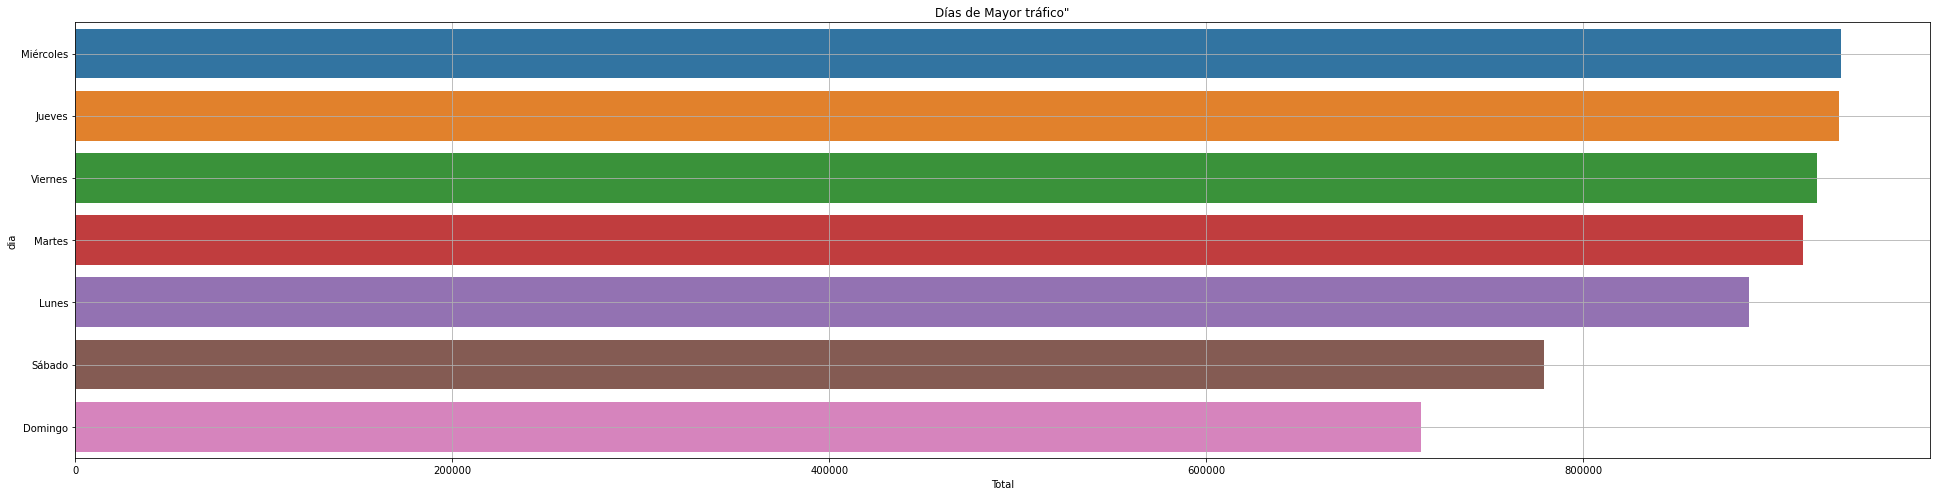

In [23]:
#Graficamos los resultados

plt.figure(figsize = (27,7))
sns.barplot(data=dias_t,x="Total", y="dia", orient="h" )
# ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha="right")
plt.title('Días de Mayor tráfico"')
plt.tight_layout()
plt.grid()


In [24]:
#Tráfico diario por año
dias_año=pd.DataFrame(data.groupby(by=["periodo","dia"])["cantidad_pasos"].count())
dias_año

cantidad_pasos
periodo dia                      
2017    Domingo            168104
        Jueves             203298
        Lunes              198573
        Martes             202956
        Miércoles          206428
        Sábado             186460
        Viernes            206826
2018    Domingo            165099
        Jueves             208075
        Lunes              198935
        Martes             201999
        Miércoles          208673
        Sábado             184360
        Viernes            208767
2019    Domingo            110596
        Jueves             118126
        Lunes              115933
        Martes             119187
        Miércoles          115713
        Sábado             114675
        Viernes            117923
2020    Domingo            270099
        Jueves             406152
        Lunes              374580
        Martes             392611
        Miércoles          406085
        Sábado             293475
        Viernes            390741

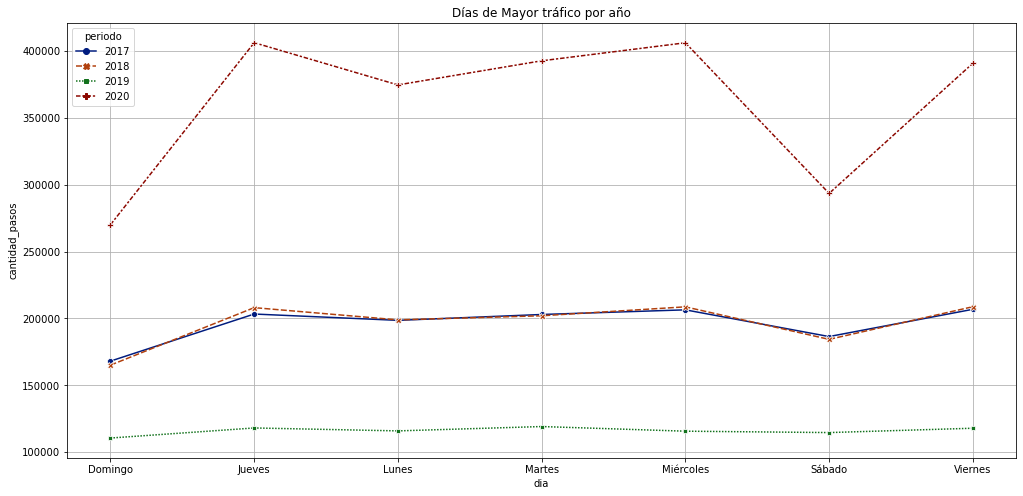

In [25]:
plt.figure(figsize=(17,8))
sns.lineplot(data=dias_año,y="cantidad_pasos",x="dia",hue="periodo",palette="dark",markers=True, style="periodo")
plt.title("Días de Mayor tráfico por año")
# plt.ylim(100000,500000)
plt.grid()

<!-- ## Promedio de horas de mayor tráfico -->

## Horas de mayor tráfico promedio diario por año

In [26]:
Horas=pd.pivot_table(data, values="cantidad_pasos",columns=["hora_fin"],aggfunc=np.mean,index=["periodo","dia"])
# pd.set_option('display.max_columns', None)
Horas

hora_fin                  0          1          2          3          4   \
periodo dia                                                                
2017    Domingo    57.036819  67.325604  70.085306  57.094387  39.381736   
        Jueves     46.808624  37.909858  25.804833  16.405723  13.617627   
        Lunes      39.188829  39.888439  27.312873  20.560689  17.870550   
        Martes     40.379693  28.967062  19.008051  13.300780  12.390677   
        Miércoles  43.934923  31.360658  20.747048  14.861414  13.933764   
        Sábado     63.719008  51.191308  45.334893  33.796520  25.112286   
        Viernes    54.880485  39.279109  27.449399  18.491924  16.120033   
2018    Domingo    58.801561  65.705757  66.679797  53.948276  39.075160   
        Jueves     45.760477  39.009644  24.135888  15.543009  13.937542   
        Lunes      41.259516  42.399880  28.704205  21.578268  17.687870   
        Martes     41.587941  30.506188  21.875185  16.991208  15.242996   
        Miércoles  43.574486  31.684363  20.862096  15.325443  14.385714   
        Sábado     62.203780  49.802080  45.147327  34.605769  25.578504   
        Viernes    54.533224  39.155256  27.004832  18.600128  16.108830   
2019    Domingo    88.863892  83.587572  76.441400  59.928443  43.985496   
        Jueves     76.973159  60.903338  41.773094  29.003454  25.404024   
        Lunes      72.411670  68.652658  48.559730  36.608473  29.900519   
        Martes     71.901673  56.614438  40.650837  31.085886  26.747247   
        Miércoles  76.382896  59.615662  44.467684  33.898888  28.982451   
        Sábado     87.872273  78.348317  65.561955  47.785176  36.568029   
        Viernes    89.845459  71.000463  51.280511  37.061642  30.470870   
2020    Domingo    21.397422  16.701271  11.498470   8.715203   7.748267   
        Jueves     16.116984  13.731863  12.026619  10.428773   9.064503   
        Lunes      14.948638  11.936479   8.978717   7.118467   6.825547   
        Martes     14.977605  12.543263   9.420804   7.824893   7.310484   
        Miércoles  15.385749  12.774837   9.475007   7.394200   6.945691   
        Sábado     21.661032  23.125586  20.914520  16.757279  13.008775   
        Viernes    18.031371  16.133309  14.106454  11.358881   9.380590   

hora_fin                  5          6           7           8           9   \
periodo dia                                                                   
2017    Domingo    31.962198  35.787488   39.214391   40.031600   46.307504   
        Jueves     18.698526  38.357043   79.955943  126.201786  140.458496   
        Lunes      21.143013  40.093484   77.725026  120.179332  128.651142   
        Martes     17.943669  37.468702   78.179857  124.163462  137.840783   
        Miércoles  19.015808  39.119014   80.639625  126.973051  140.090380   
        Sábado     25.532589  36.261999   48.791354   64.738253   86.058789   
        Viernes    20.657010  40.411303   79.219554  123.357569  135.167119   
2018    Domingo    31.866743  36.795149   40.230920   41.406301   47.458635   
        Jueves     19.051298  39.720740   82.753161  124.457097  136.147804   
        Lunes      21.364656  41.686006   80.608571  114.784610  122.267151   
        Martes     19.197726  40.038984   82.250029  121.483205  132.459177   
        Miércoles  19.330983  39.934229   82.307849  121.543975  133.414603   
        Sábado     26.022038  37.266485   50.479615   65.040814   85.116072   
        Viernes    20.606523  41.428369   82.009304  120.413845  130.731560   
2019    Domingo    41.078927  59.854835   89.316649  117.213652  131.575456   
        Jueves     32.754364  67.890073  139.521416  210.420184  233.412456   
        Lunes      36.267463  69.730130  134.068112  198.132293  215.804222   
        Martes     33.648295  65.771287  134.375959  201.348902  223.290590   
        Miércoles  34.482802  68.236667  138.149929  208.667571  228.353402   
        Sábado     39.042716  63.083890  100.929708  140.175

Text(0.5, 1.0, 'Hora de mayor tráfico por día')

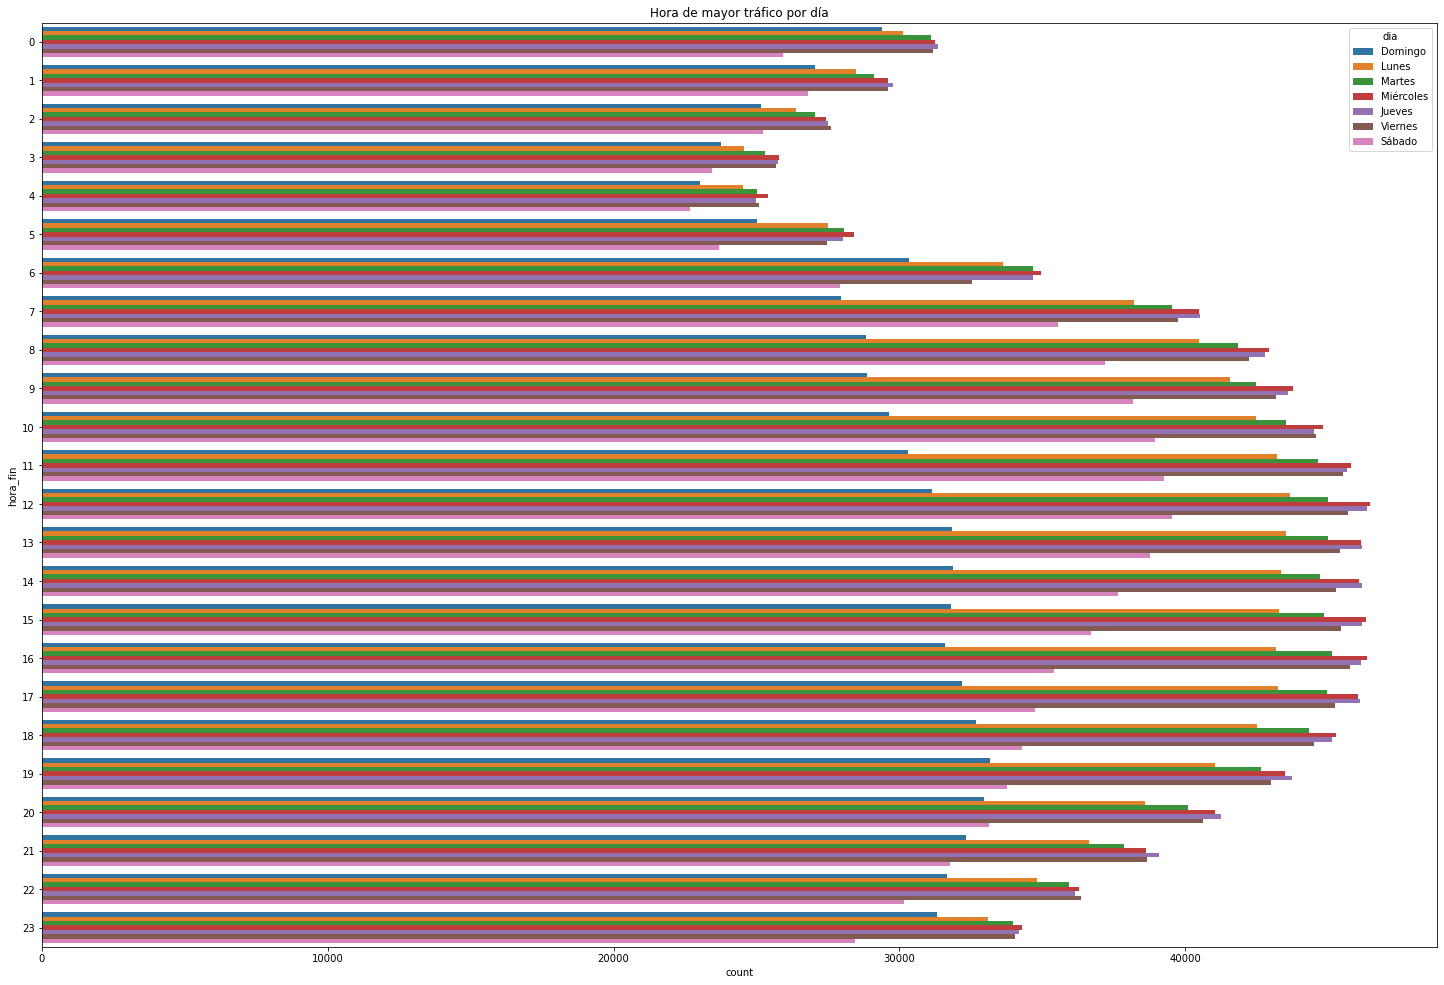

In [27]:
#Graficamos
plt.figure(figsize=(25,17))
sns.countplot(data=data, y="hora_fin", hue="dia",orient="h")
plt.title("Hora de mayor tráfico por día")

In [42]:
print(Horas.min(),"\n")
print(Horas.max())

hora_fin
0     14.948638
1     11.936479
2      8.978717
3      7.118467
4      6.825547
5      9.764476
6     17.777009
7     18.758978
8     18.306601
9     18.603598
10    21.886553
11    27.619424
12    33.533689
13    36.499284
14    30.947395
15    25.639573
16    26.655312
17    30.141428
18    34.340793
19    37.176788
20    35.913277
21    30.887278
22    24.470028
23    18.312125
dtype: float64 

hora_fin
0      89.845459
1      83.587572
2      76.441400
3      59.928443
4      43.985496
5      41.078927
6      69.730130
7     139.521416
8     210.420184
9     233.412456
10    223.485076
11    211.147218
12    216.473486
13    224.535848
14    227.857196
15    220.955831
16    225.470458
17    230.325744
18    242.562477
19    241.033151
20    203.357019
21    190.929365
22    157.041102
23    112.862881
dtype: float64


## Representación de la forma de pago a través de los años

In [43]:
TPago=data[["forma_pago", "periodo","cantidad_pasos"]].groupby(["forma_pago", "periodo"]).count()
TPago

cantidad_pasos
forma_pago           periodo                
CPP                  2020              17379
EFECTIVO             2017             447203
                     2018             423633
                     2019             149340
                     2020             264083
EXENTO               2017             169889
                     2018             162103
                     2019             132716
                     2020             149718
INFRACCION           2017             140275
                     2018             153331
                     2019             111428
                     2020             424291
MONEDERO             2017                 14
NO COBRADO           2017             117730
                     2018             121440
                     2019             141280
Otros                2017                  8
REC.DEUDA            2020             187388
TARJETA DISCAPACIDAD 2017             100106
                     2018              86348
                     2019              76001
                     2020              50495
TELEPASE             2017             397420
                     2018             429053
                     2019             201388
                     2020            1440389

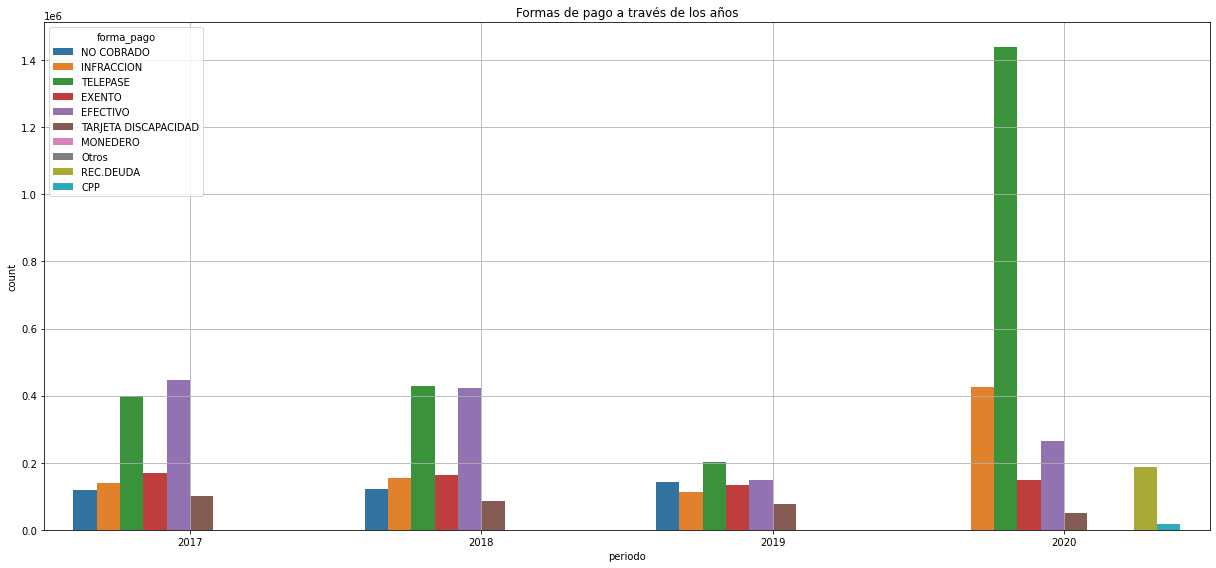

In [51]:
plt.figure(figsize = (17,8))
sns.countplot(data=data, x="periodo",hue="forma_pago" )
# ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha="right")
plt.title('Formas de pago a través de los años')
plt.tight_layout()
# plt.ylim(0,60000)
plt.grid()

## Representación de flujo vehicular por estacion a través de los años

In [52]:
TEstacion=data[["estacion", "periodo","cantidad_pasos"]].groupby(["estacion", "periodo"]).count()
TEstacion

cantidad_pasos
estacion   periodo                
Alberdi    2017             150583
           2018             153037
           2019             132279
           2020             194723
Avellaneda 2017             391842
           2018             394371
           2019             186443
           2020             551751
Dellepiane 2017             357124
           2018             353441
           2019             187600
           2020             507858
Illia      2017             291900
           2018             299519
           2019             161133
           2020             296053
Ilp        2020             295255
PDB        2019              40964
Pb1        2020             160169
Pb2        2020             107744
Pb3        2020              78508
Pb4        2020             147871
Retiro     2017             133584
           2018             119969
           2019              53975
           2020              95342
Salguero   2017              23381
           2018              28058
           2019              24869
           2020              51329
Sarmiento  2017              24231
           2018              27513
           2019              24890
           2020              47140

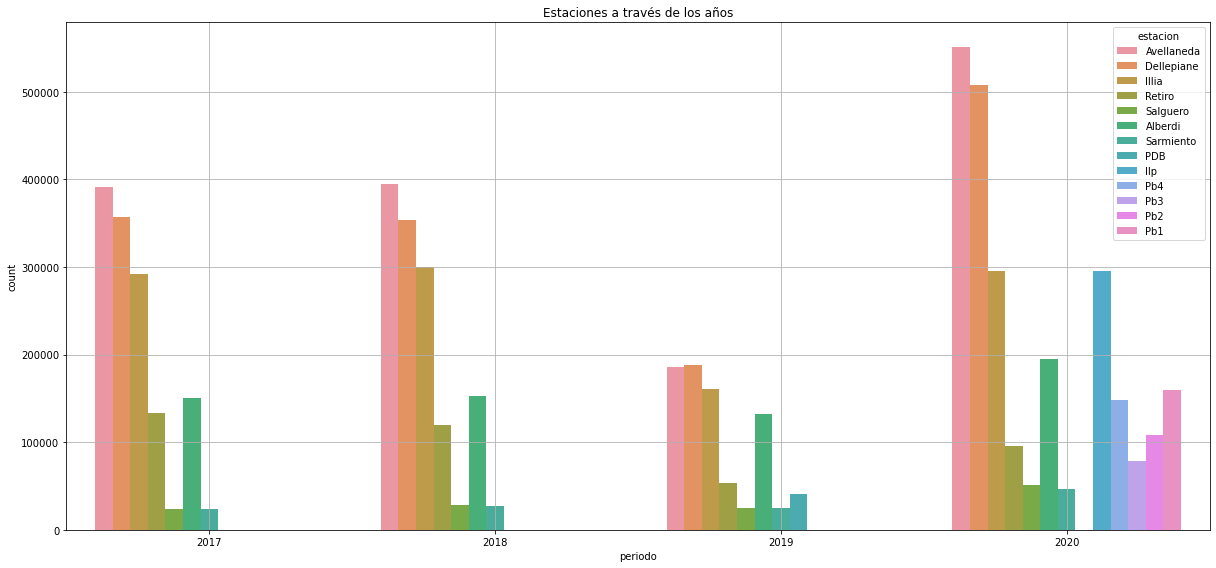

In [53]:
plt.figure(figsize = (17,8))
sns.countplot(data=data, x="periodo",hue="estacion", )
# ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha="right")
plt.title('Estaciones a través de los años')
plt.tight_layout()
# plt.ylim(0,60000)
plt.grid()

Dado el analisis exploratorio de datos podemos observar que los días de mayor tráafico son los miércoles, los horarios con mayor tráfico son las 18 y 19 hrs, los cuales podemos deducir que se deben a la salida de la jornada laboral, con respecto a la forma de pago se puede observar claramente que el TELEPASE vino incrementando en los últimos años mientras que el Efectivo que en 2017 era el principal metodo de pago en 2020 paso a un tercer lugar.

Cabe mencionar que los datasets de los años 2017 y 2018 son similares en cantidad de registros, sin embargo el de 2019 cuenta con menos registros y el de 2020 tiene cerca del doble que los primeros, además que este contiene mayor número de estaciones, por lo que para analizar la serie de tiempo y realizar el su pronostico solo no quedaremos con una estacion y un tipo de pago para ser consistentes por todo el periodo analizado.

### Ahora contruiremos el dataset con el que analizaremos la serie y sus componentes, tomando la estación: Dellapiane y forma de pago: Telepase

In [55]:
#Dataset estación Dellapiane y la forma de pago Telepase
mask = np.logical_and(data.estacion=='Dellepiane', data.forma_pago == 'TELEPASE')
data_Dellepiane = data[mask]

#Quitamos las columnas que no vamos a utilizar
data_Dellepiane.drop(columns = ['hora_inicio','forma_pago', 'estacion'], inplace = True)

#Ordenamos el dataset

data_Dellepiane.sort_values(by=["Fecha_C"], ascending=False)
data_Dellepiane.reset_index(drop=True, inplace = True)

data_Dellepiane.head()

C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,periodo,fecha,dia,hora_fin,tipo_vehiculo,sentido,cantidad_pasos,Fecha_C
0,2017,2017-01-01,Domingo,0,Liviano,Provincia,141,2017-01-01
1,2017,2017-01-01,Domingo,0,Pesado,Provincia,17,2017-01-01
2,2017,2017-01-01,Domingo,0,Pesado,Provincia,1,2017-01-01
3,2017,2017-01-01,Domingo,0,Pesado,Centro,6,2017-01-01
4,2017,2017-01-01,Domingo,0,Pesado,Centro,2,2017-01-01


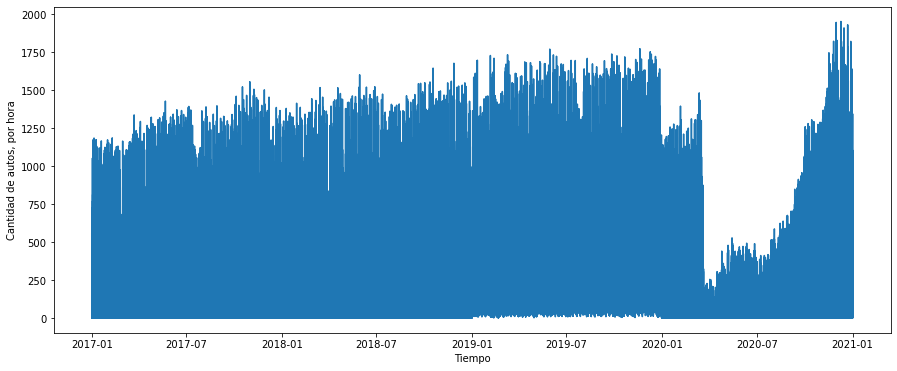

In [56]:
#Graficamos nuestro dataset Dellepiane
plt.figure(figsize = (15,6))
plt.plot(data_Dellepiane.Fecha_C, data_Dellepiane.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

### Resampleamos nuestros datos de forma diaria, mensual y semanal

In [57]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diarioD = data_Dellepiane.resample('D', on = 'Fecha_C').sum()
diarioD=diarioD.drop(columns=["periodo", "hora_fin"])
print(diarioD.shape)
diarioD.head()

(1461, 1)


,cantidad_pasos
Fecha_C,
2017-01-01,13859
2017-01-02,24717
2017-01-03,25465
2017-01-04,26870
2017-01-05,27353


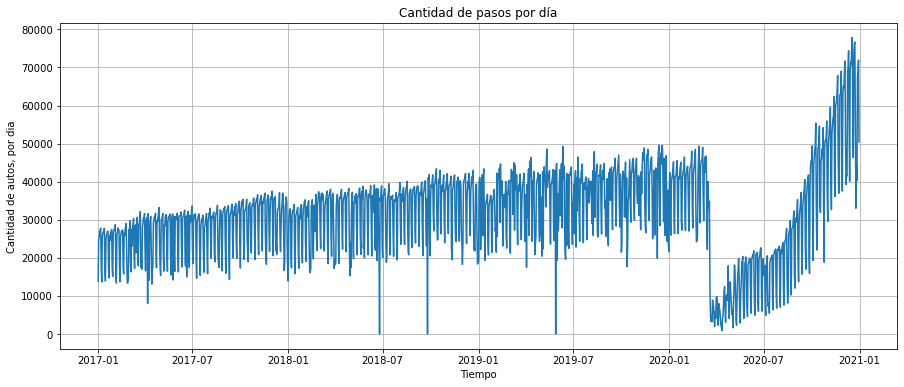

In [58]:
#Graficamos
plt.figure(figsize = (15,6))
plt.plot(diarioD.index, diarioD.cantidad_pasos)
plt.title("Cantidad de pasos por día")
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.grid()
plt.show()

In [59]:
diarioD.describe()

,cantidad_pasos
count,1461.000000
mean,31481.524298
std,11807.609719
min,0.000000
25%,23548.000000
50%,32127.000000
75%,39136.000000
max,77875.000000


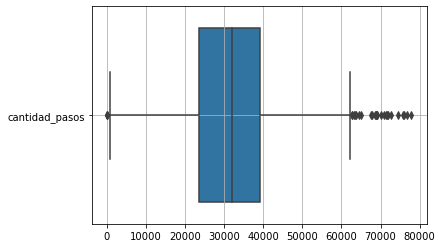

In [60]:
# Observamos la distribución de los datos
sns.boxplot(data=diarioD, orient="horizontal")
plt.grid()

In [61]:
#De acuerdo al boxplot anterior, observaremos los valores atipicos de la serie
AtipicosD=diarioD[diarioD.cantidad_pasos <= 5000]
# pd.set_option("display.max_rows", None)
AtipicosD

,cantidad_pasos
Fecha_C,
2018-06-25,0
2018-09-25,0
2019-05-29,0
2020-03-21,4756
2020-03-22,3266
2020-03-23,4812
2020-03-24,3211
2020-03-28,3662
2020-03-29,1963


## Investigación de días con poco flujo vehicular
Tomaremos los días con número de pasos menor a 5000 como valores atipicos de la serie a investigar tomando como base el gráfico realizado.

De acuerdo a lo anterior se investigo sobre estos días y observamos que no son valores perdidos y que el poco o nulo flujo vehicular se debe a lo siguiente:

- 25 junio 2018: Tercer paro general contra la gestión de Mauricio Macri
    
- 25 septiembre 2018:  Cuarto paro general contra la gestión de Mauricio Macri
    
- 29 mayo de 2019: Quinto paro general contra el presidente Mauricio Macri

- Los días restantes podemos observar que empiezan a partir de marzo 2020, mes cuando se hizo oficial la pandemia mundial por COVID-19, lo cual afectó la movilidad y paro de actividades económicas

In [63]:
#Resampleamos de forma semanal
semana=data_Dellepiane.resample("w", on="Fecha_C").sum()
semana.drop(columns=["periodo","hora_fin"],inplace=True)
print(semana.shape)
semana.head()

(210, 1)


,cantidad_pasos
Fecha_C,
2017-01-01,13859
2017-01-08,162835
2017-01-15,164563
2017-01-22,162681
2017-01-29,163927


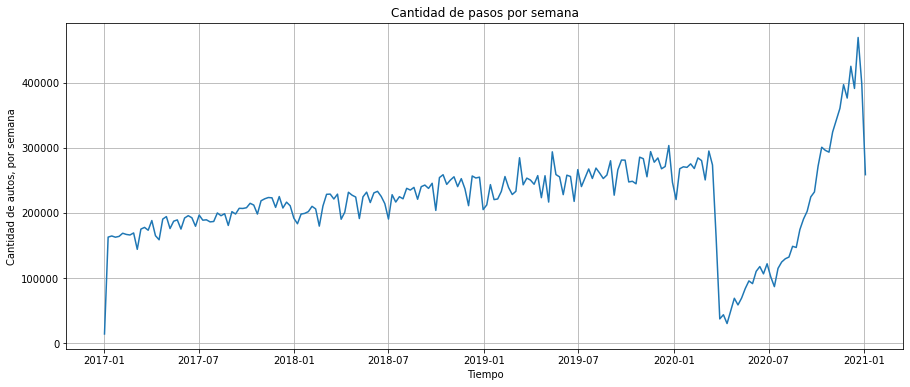

In [64]:
#Graficamos
plt.figure(figsize = (15,6))
plt.plot(semana.index, semana.cantidad_pasos)
plt.title("Cantidad de pasos por semana")
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.grid()
plt.show()

Con los resampleos realizados podemos observar que la series tiene una tendencia a la alta, aún cuando a mitad del primer semestre de 2020 se tuvo una disminución exponencial debido a la pandemia, el último trimestre de 2020 se normalizó con tendencia a la alta superando los años anteriores.

## Componentes de la serie

### Media móvil

In [65]:
diarioD["Diario_promedio"]=diarioD["cantidad_pasos"].rolling(window=7).mean()
diarioD.head(15)

,cantidad_pasos,Diario_promedio
Fecha_C,,
2017-01-01,13859,NaN
2017-01-02,24717,NaN
2017-01-03,25465,NaN
2017-01-04,26870,NaN
2017-01-05,27353,NaN
2017-01-06,27806,NaN
2017-01-07,16980,23292.857143
2017-01-08,13644,23262.142857
2017-01-09,25611,23389.857143


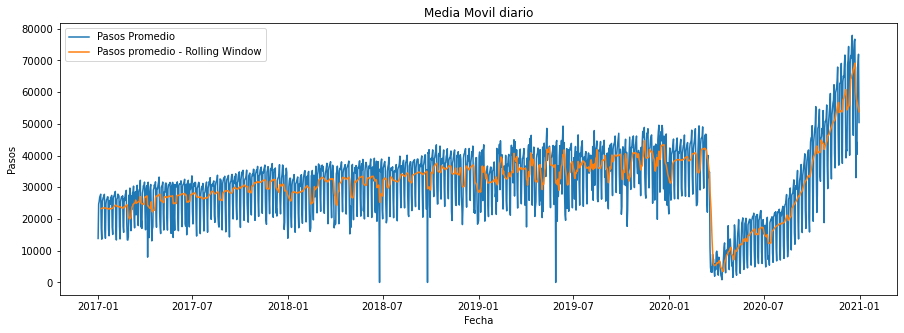

In [66]:
plt.figure(figsize = (15,5))
# plt.plot(semanaF.index, semanaF.cantidad_pasos, label = 'Pasos promedio')
plt.plot(diarioD.index, diarioD.cantidad_pasos, label = 'Pasos Promedio')
plt.plot(diarioD.Diario_promedio,  label = "Pasos promedio - Rolling Window" )
plt.title(label="Media Movil diario")
plt.xlabel('Fecha')
plt.ylabel('Pasos')
plt.legend()
plt.show()

#### Veremos la tendencia lineal de la serie, para lo cual convertiremos la fecha en números y se pueda aplicarse una regresión lineal

In [67]:
diarioD['fecha_numeros']=diarioD.index.map(datetime.datetime.toordinal)
diarioD.head(10)

,cantidad_pasos,Diario_promedio,fecha_numeros
Fecha_C,,,
2017-01-01,13859,NaN,736330
2017-01-02,24717,NaN,736331
2017-01-03,25465,NaN,736332
2017-01-04,26870,NaN,736333
2017-01-05,27353,NaN,736334
2017-01-06,27806,NaN,736335
2017-01-07,16980,23292.857143,736336
2017-01-08,13644,23262.142857,736337
2017-01-09,25611,23389.857143,736338


In [68]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diarioD.fecha_numeros.values.reshape(-1, 1), diarioD.cantidad_pasos)

LinearRegression()

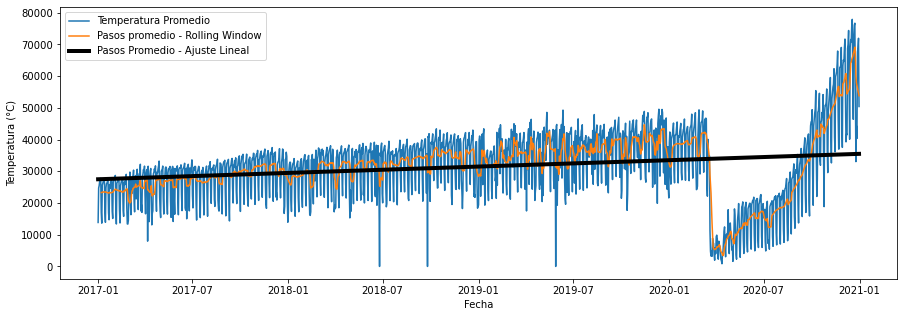

In [25]:
plt.figure(figsize = (15,5))
plt.plot(diarioD.index, diarioD.cantidad_pasos, label = 'Temperatura Promedio')
plt.plot(diarioD.Diario_promedio,  label = "Pasos promedio - Rolling Window" )
# plt.plot(semanal_promedio_tendencia, ls = '--', lw = 4, label = 'Temperatura Promedio - Rolling Window')
plt.plot(diarioD.index, lr.predict(diarioD.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Pasos Promedio - Ajuste Lineal',color="black")
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

Claramente podemos observar que la serie sigue una tendencia lineal a la alza, y no consideramos el primer semestre de 2020, facilmente nuestra función lineal se ajustaría muy bien a los datos

### Veremos los componentes restantes de la serie con stats model

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diarioD.cantidad_pasos, model='additive')

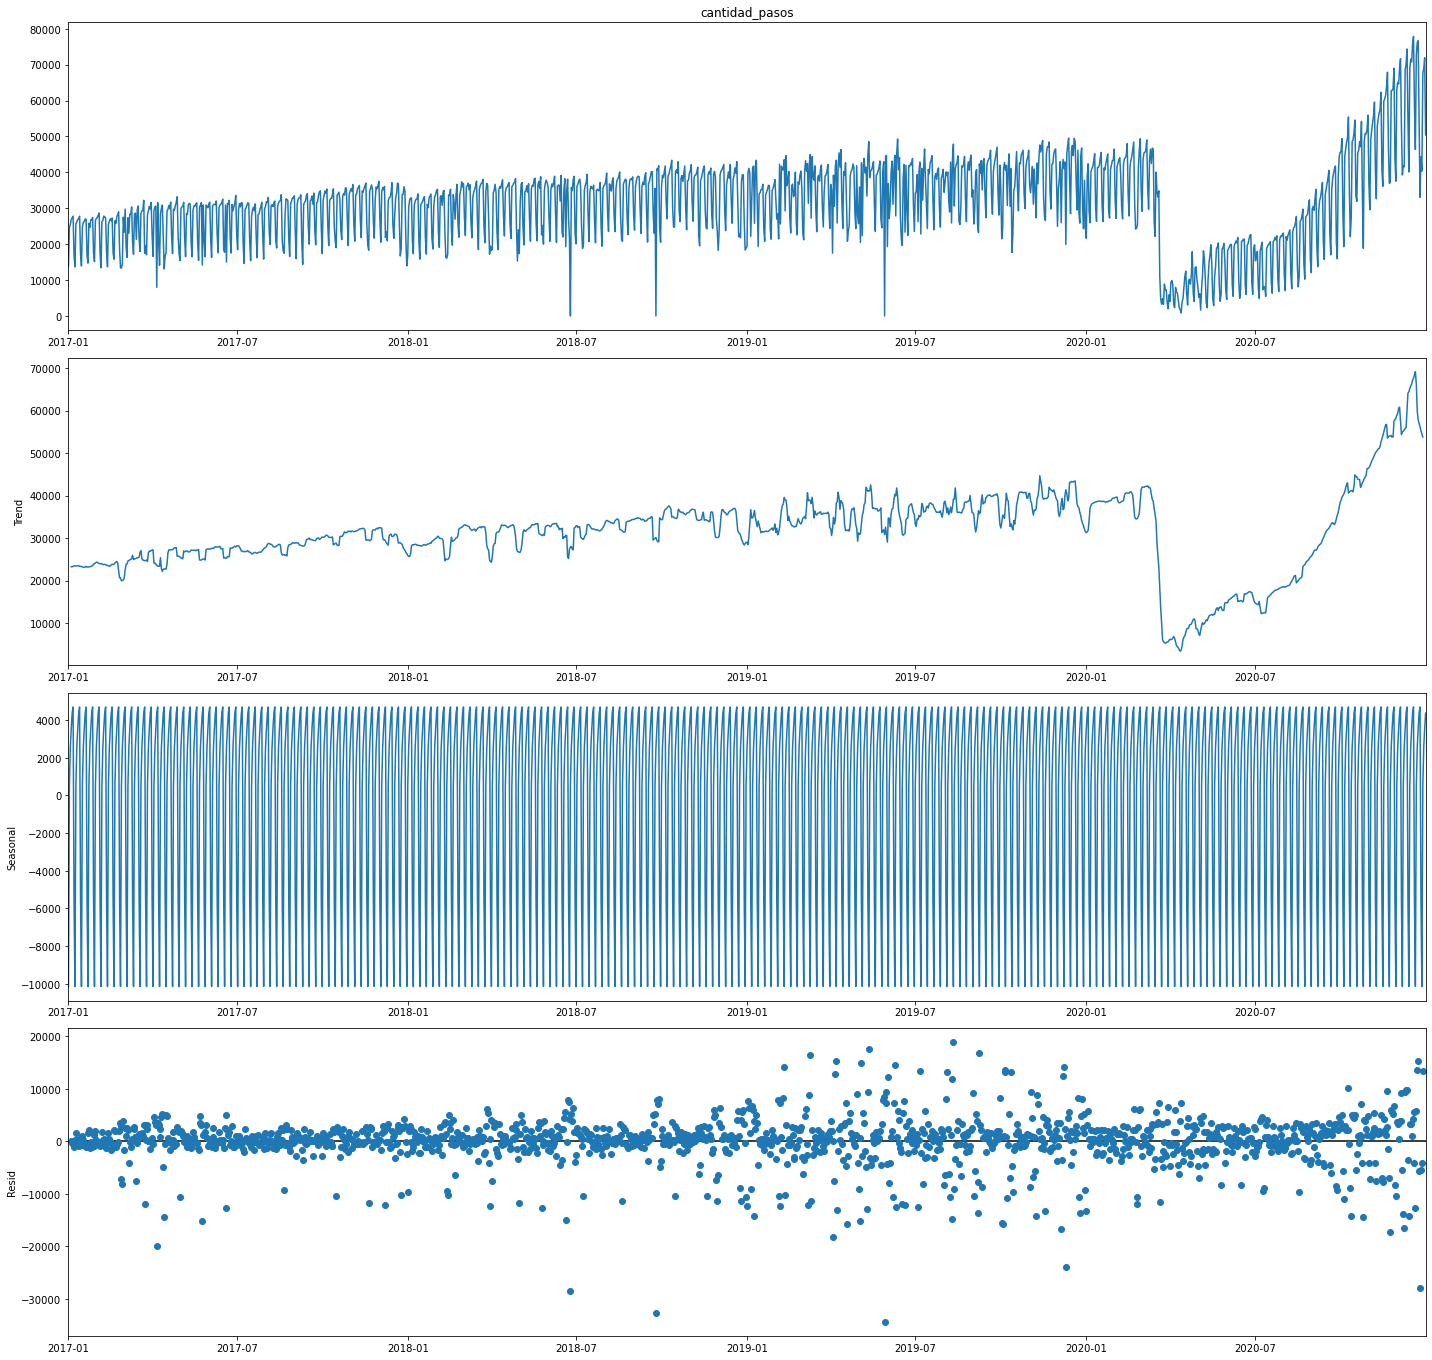

In [70]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20,19]
result.plot()
plt.show()

In [71]:
#Semanal
result_S = seasonal_decompose(semana.cantidad_pasos, model='additive')

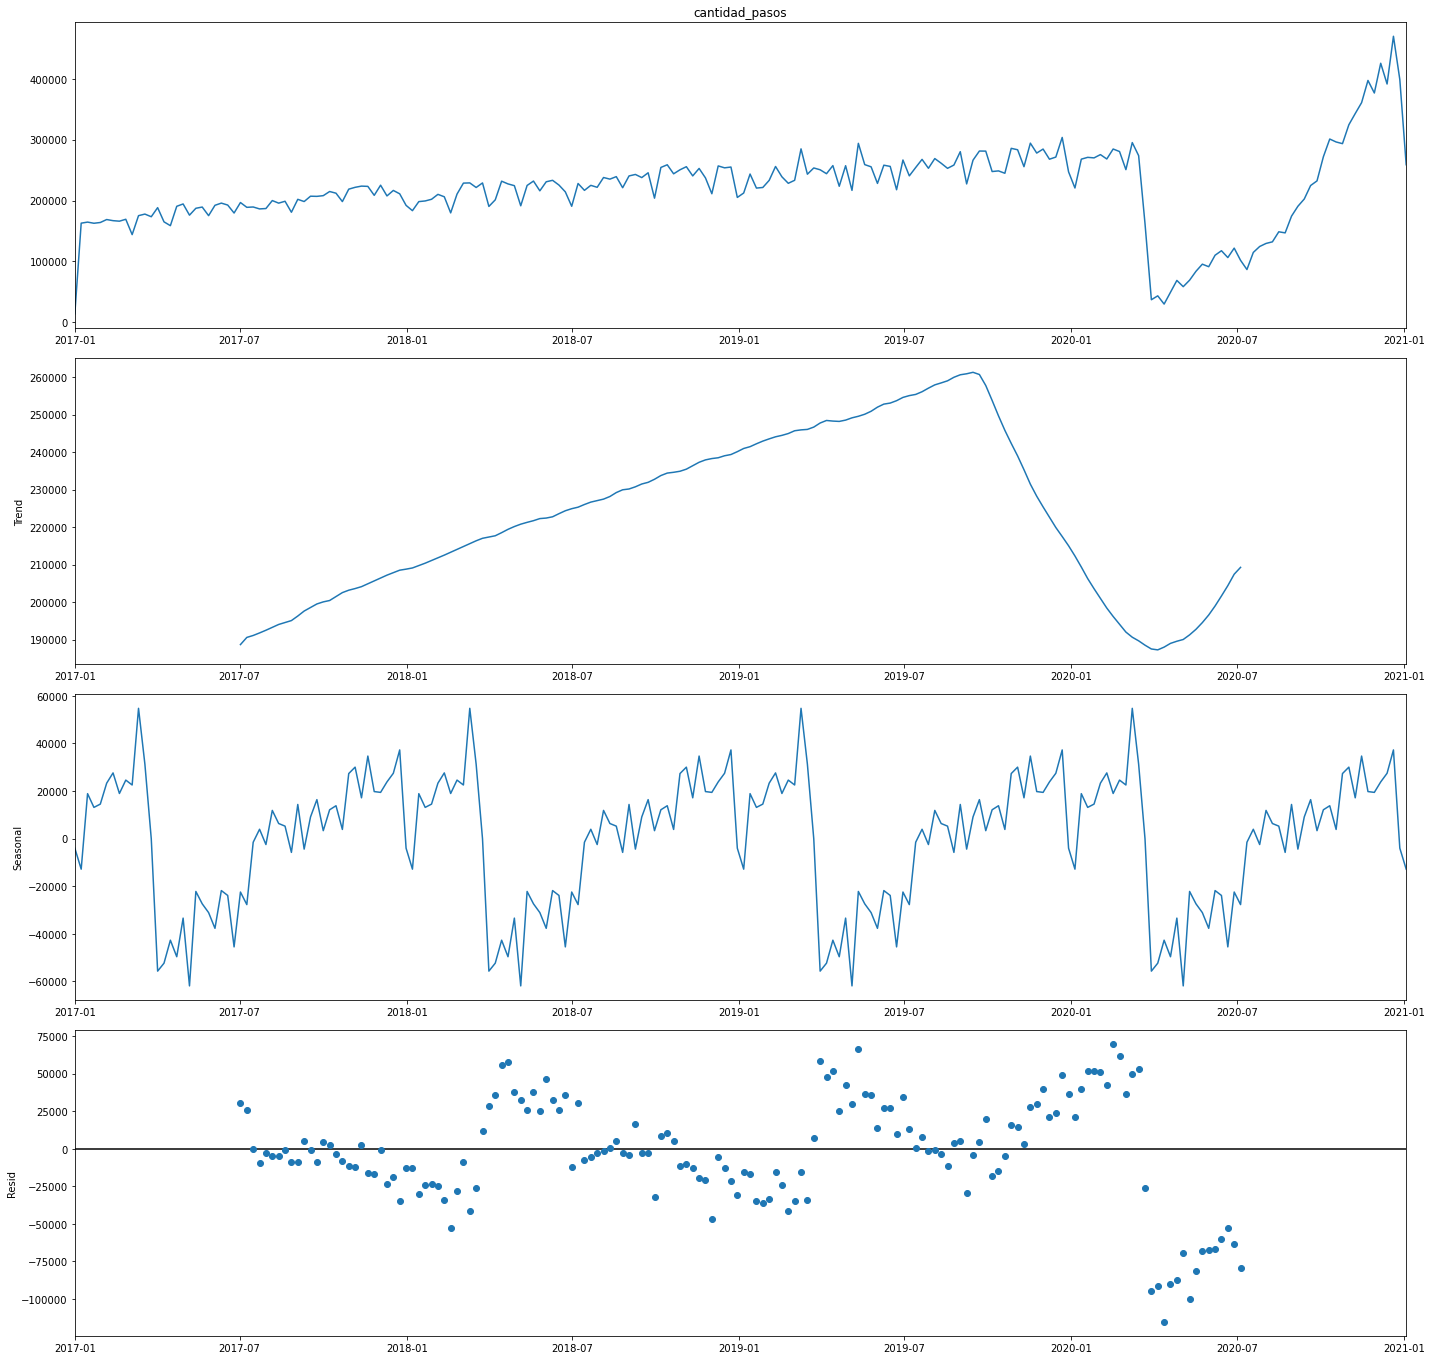

In [72]:
matplotlib.rcParams['figure.figsize'] = [20,19]
result_S.plot()
plt.show()

De acuerdo a los componentes vistos, podemos decir que la serie de tiempo presenta una tendencia a la alta y con estacionalidad semanal

## Predicción

Tomaremos los datatset armados y los convertiremos en un modelo de predicción univariado, solo considerando la fecha con frecuencia diaria como indice y la cantidad de pasos

_______

In [75]:
data_Dellepiane.head()

,periodo,fecha,dia,hora_fin,tipo_vehiculo,sentido,cantidad_pasos,Fecha_C
0,2017,2017-01-01,Domingo,0,Liviano,Provincia,141,2017-01-01
1,2017,2017-01-01,Domingo,0,Pesado,Provincia,17,2017-01-01
2,2017,2017-01-01,Domingo,0,Pesado,Provincia,1,2017-01-01
3,2017,2017-01-01,Domingo,0,Pesado,Centro,6,2017-01-01
4,2017,2017-01-01,Domingo,0,Pesado,Centro,2,2017-01-01


In [77]:
M_Dellepiane=data_Dellepiane

In [78]:
#Eliminamos las columnas que no ocuparemos
M_Dellepiane=M_Dellepiane[["Fecha_C","cantidad_pasos"]]
M_Illia_ilia=M_Illia_ilia[["Fecha_C","cantidad_pasos"]]

In [79]:
M_Dellepiane=M_Dellepiane.groupby([pd.Grouper(key="Fecha_C", freq="d")]).sum().reset_index()
print(M_Dellepiane.info())
M_Dellepiane

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha_C         1461 non-null   datetime64[ns]
 1   cantidad_pasos  1461 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 23.0 KB
None


,Fecha_C,cantidad_pasos
0,2017-01-01,13859
1,2017-01-02,24717
2,2017-01-03,25465
3,2017-01-04,26870
4,2017-01-05,27353
...,...,...
1456,2020-12-27,40338
1457,2020-12-28,67609
1458,2020-12-29,68890
1459,2020-12-30,71914


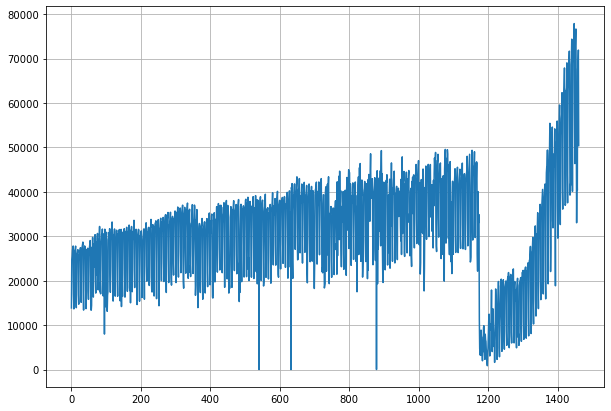

In [81]:
#Graficamos el dataset para ver sus valores
plt.figure(figsize=(10,7))
plt.plot(M_Dellepiane.index, M_Dellepiane.cantidad_pasos)
plt.grid()

Creamos un dataset con el rango de fechas de 2017 a 2020 con fecuencia diaria para ver que en nuestro dataset no existan días faltantes

In [82]:
AllDates=pd.date_range(start='2017-01-01', end='2020-12-31',freq='D').to_frame().rename(columns={0:"Fecha"})

In [83]:
print(AllDates.info())
AllDates.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2017-01-01 to 2020-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   1461 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 22.8 KB
None


,Fecha
2017-01-01,2017-01-01
2017-01-02,2017-01-02
2017-01-03,2017-01-03
2017-01-04,2017-01-04
2017-01-05,2017-01-05


Con lo anterior podemos ver que nuestro dataset no cuenta días faltantes, pero viendo el gráfico y teniendo antecedente (resampleo diario) de la investigación de dias con menor tráfico vehicular sabemos que existen 3 días con cantidad de pasos en 0.

In [84]:
#Observaremos los valores con cantidad de pasos igual a 0
cero_pasos=M_Dellepiane[M_Dellepiane.cantidad_pasos == 0]
# pd.set_option("display.max_rows", None)
cero_pasos

,Fecha_C,cantidad_pasos
540,2018-06-25,0
632,2018-09-25,0
878,2019-05-29,0


Dados los días con cantidad de pasos en 0 y con motivo de rezliar la mejor predicción posible, convertiremos esos valores al promedio de la serie

In [85]:
M_Dellepiane.cantidad_pasos=M_Dellepiane.cantidad_pasos.replace({0:int(M_Dellepiane.cantidad_pasos.mean())})
M_Dellepiane.cantidad_pasos=M_Dellepiane.cantidad_pasos.astype(int)


In [86]:
cero_pasos2=M_Dellepiane[M_Dellepiane.cantidad_pasos == 0]
cero_pasos2

,Fecha_C,cantidad_pasos


# Modelos

### Modelo de Benchmark

Lo primero que haremos será probar un modelo de benchmark, para lo cual ocuparemos una regresión lineal y por esto crearemos una columna de fecha con con valores numéricos, para poder entregarle al modélo un 1 columna de feature y una target

In [87]:
B_Model=M_Dellepiane
B_Model

,Fecha_C,cantidad_pasos
0,2017-01-01,13859
1,2017-01-02,24717
2,2017-01-03,25465
3,2017-01-04,26870
4,2017-01-05,27353
...,...,...
1456,2020-12-27,40338
1457,2020-12-28,67609
1458,2020-12-29,68890
1459,2020-12-30,71914


In [88]:
#Crearemos una columa de fecha con formato númerico para poderla ocupar con los modelos de machine learning que ocuparemos
B_Model['Fecha_Num']=B_Model.Fecha_C.map(datetime.datetime.toordinal)
#Indexaremos el datset por la fecha de columna
B_Model.set_index("Fecha_C", inplace=True)
B_Model

,cantidad_pasos,Fecha_Num
Fecha_C,,
2017-01-01,13859,736330
2017-01-02,24717,736331
2017-01-03,25465,736332
2017-01-04,26870,736333
2017-01-05,27353,736334
...,...,...
2020-12-27,40338,737786
2020-12-28,67609,737787
2020-12-29,68890,737788


Definimos los set de entrenamiento y validación

In [89]:
DTrain=B_Model.loc["2017-01-01":"2019-09-30"]
DTest=B_Model.loc["2019-10-01":"2019-12-31"]
DTrain2=B_Model.loc["2017-10-01":]

In [90]:
Xtrain=B_Model.loc["2017-01-01":"2019-09-30"]
# X = data2.drop(['price'],axis=1)
ytrain=Xtrain.cantidad_pasos

Xtest=B_Model.loc["2019-10-01":"2019-12-31"]
ytest=Xtest.cantidad_pasos

In [91]:
Xtrain=Xtrain.drop(["cantidad_pasos"],axis=1)
Xtest=Xtest.drop(["cantidad_pasos"],axis=1)

## Metrica
#### De acuerdo al tipo de modelo que realizaremos, probaremos las siguientes metricas para regresión:

- Error cuadrático medio (RMSE)
- R al cuadrado (R²)
- Error absoluto medio (MAE)

In [92]:
#Importamos las metricas que ocuparemos para los modelos
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
#Intanciamos el modelo de Benchmark que probaremos
lr=LinearRegression()
lr.fit(Xtrain, ytrain)

LinearRegression()

Modelo Benchmar: Regresión Lineal
RMSE en train: 6755.853535643803
RMSE en Test: 7996.834004228528
R2 en train: 0.2559554050933506
R2 en Test: 0.0016542168304147786
MAE en train: 5891.362963494591
MAE en Test: 6756.8416179237765


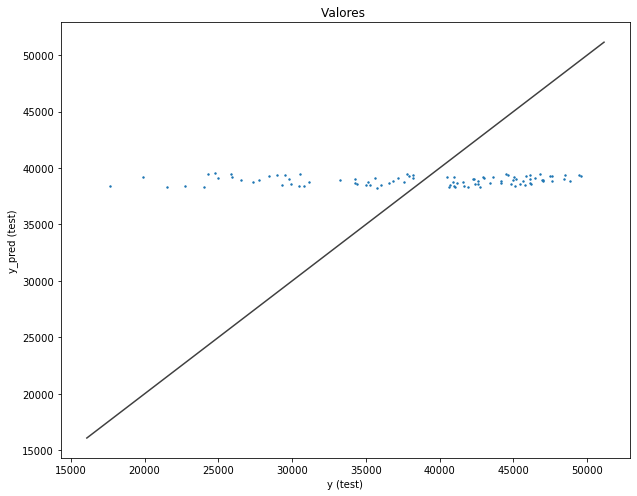

In [96]:
#Modelo de Benchmark

#Predecimos y graficamos el modelo
modelos = ['Regresión Lineal']

for i, model in enumerate([lr]):
    y_train_pred = model.predict(Xtrain)
    y_test_pred = model.predict(Xtest)
    
    
    print(f'Modelo Benchmar: {modelos[i]}')

    RMSE_train =mean_squared_error(ytrain, y_train_pred,squared=False)
    RMSE_test = mean_squared_error(ytest, y_test_pred,squared=False)
    print(f'RMSE en train: {RMSE_train}')
    print(f'RMSE en Test: {RMSE_test}')
    
    r2_train =r2_score(ytrain, y_train_pred)
    r2_test = r2_score(ytest, y_test_pred)
    print(f'R2 en train: {r2_train}')
    print(f'R2 en Test: {r2_test}')
    
    MAE_train =mean_absolute_error(ytrain, y_train_pred)
    MAE_test = mean_absolute_error(ytest, y_test_pred)
    print(f'MAE en train: {MAE_train}')
    print(f'MAE en Test: {MAE_test}')
    
    
    
    plt.figure(figsize = (17,7))

    ax = plt.subplot(1,2,2)
    ax.scatter(ytest,y_test_pred, s =2)
#     ax.scatter(RMSE_test,RMSE_train, s =2)
    plt.title('Valores ')
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

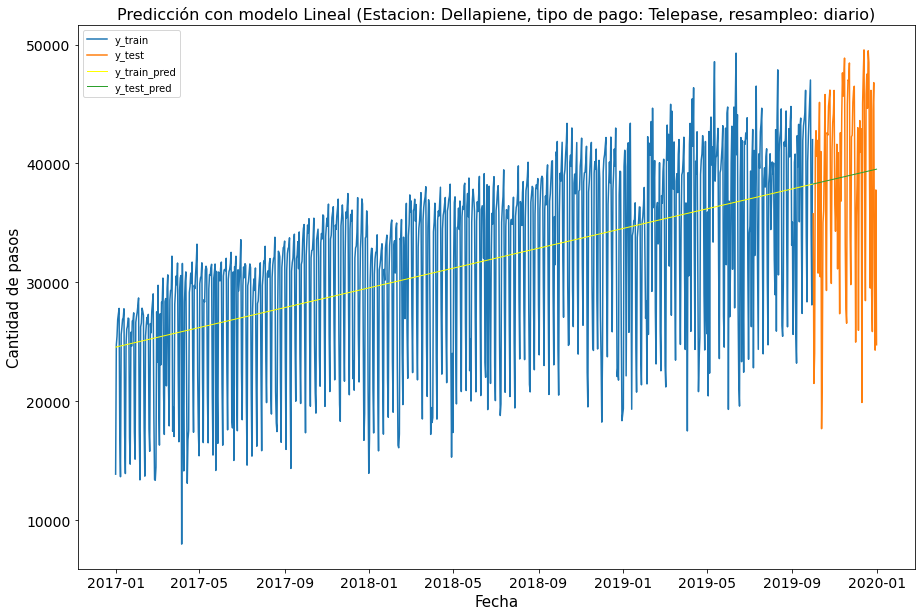

In [97]:
plt.figure(figsize = (15,10))
# Series de datos de la gráfica
plt.plot(DTrain.index, DTrain.cantidad_pasos, label = 'y_train')
plt.plot(DTest.index, DTest.cantidad_pasos, label = 'y_test')
plt.plot(DTrain.index, y_train_pred, label = 'y_train_pred', color='yellow', lw = 1)
plt.plot(DTest.index, y_test_pred, label = 'y_test_pred',  lw = 1)
#Formato de la gráfica
plt.title('Predicción con modelo Lineal (Estacion: Dellapiene, tipo de pago: Telepase, resampleo: diario)',fontsize=16)
plt.xlabel('Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.legend()

## Modelo de predicción con Redes Neuronales

Como objetivo de este proyecto implementaremos un nuevo modelo no probado dentro de la cursada, por lo cual ocuparemos una de Red Neuronal Recurrente LSTM, la cual tiene como principal caracteristica que la información puede persistir introduciendo bucles en el diagrama de la red, por lo que, básicamente, pueden recordar estados previos y utilizar esta información para decidir cuál será el siguiente. Esta caracteristicas hace muy adecuada para predecir series de tiempo, por lo que buscaremos mejorar la predicción de nuestro modelo de Benchmark y los resultados del proyecto número 3.

Aquí una pequeña explicación de las Redes LSTM
### Redes LSTM
Las redes de memoria a corto plazo largo, generalmente simplemente llamadas "LSTMs", son un tipo especial de RNN, capaz de aprender dependencias a largo plazo. Fueron introducidos por Hochreiter &Schmidhuber (1997). Los LSTM están diseñados explícitamente para evitar el problema de dependencia a largo plazo. Recordar información durante largos períodos de tiempo es prácticamente su comportamiento predeterminado.

El contenido de un artículo completo sobre las Redes Neuronales LSTM se pueden ver [aquí](https://github.com/jarenasz/Series-de-tiempo-Forescasting/blob/main/DS_Proyecto_03_ST%20(Github).ipynb)
_____

Iniciamos definiendo el dataset con el trabajaremos para el modelo

In [98]:
NN_Model=M_Dellepiane
NN_Model.drop(columns=["Fecha_Num"],inplace=True)
NN_Model

,cantidad_pasos
Fecha_C,
2017-01-01,13859
2017-01-02,24717
2017-01-03,25465
2017-01-04,26870
2017-01-05,27353
...,...
2020-12-27,40338
2020-12-28,67609
2020-12-29,68890


Para este modelo, convertiremos nuestra serie univariante (tenniendo solo la columna de cantidad de pasos) en un conjunto con mas columnas que serán los valores previos a nuestra columna, que para este caso ocuparemos 7 valores (look_back), es decir los 7 días previos y obtener el 8o, con lo cual entrenaremos a nuestra red neuronal y poder entrenarla con backpropagation

Por lo anterior transformaremos nuestro dataset inicial con una función para crear un nuevo conjunto de datos, la cual toma dos argumentos, el conjunto de datos  y el look_back, que es el número de pasos de tiempo previos que se deben utilizar como variables de entrada para predecir el siguiente período de tiempo.

In [99]:
# convertir un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [100]:
# En este caso solo tomaremos los valores del dataset y los convertiremos en flotantes
# dataset = NN_Model.values
# dataset = dataset.astype('float32')
dataset = NN_Model.astype('float32')

In [101]:
dataset

,cantidad_pasos
Fecha_C,
2017-01-01,13859.0
2017-01-02,24717.0
2017-01-03,25465.0
2017-01-04,26870.0
2017-01-05,27353.0
...,...
2020-12-27,40338.0
2020-12-28,67609.0
2020-12-29,68890.0


Debido a que Las LSTMs son sensibles a la escala de los datos de entrada, escalaremos nuestros datos con MinMaxScaler en una escala de -1 y 1

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
# Instanciamos y escalamos los datos  en un rango en -1 y 1
scaler = MinMaxScaler(feature_range=(-1, 1))
dataset = scaler.fit_transform(dataset)

Dividimos nuestro dataset en conjuntos de entranamiento y validación, considerando el primer 75% de nuestros datos como entranamiento y los datos restantes como validación

In [104]:
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [107]:
# train

In [108]:
# Remodelamos nuestros datos con la función creada, tomando como 7 días previos
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [110]:
# trainX

Debido a que la red LSTM debe recibir datos de entrada con una estructura de matriz específica en forma de: [muestras, pasos de tiempo, características], cambiaremos la forma de nuestros conjuntos train y test

In [111]:
# remodelamos la entrada para que sea[muestras, pasos de tiempo, características]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [112]:
# Importamos Keras y los módulos a ocupar para para nuestra red
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping

Using TensorFlow backend.
C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jorge\miniconda3\envs\proj

### Ahora crearemos nuestra Red LSTM simple, la cual presenta la siguiente arquitectura:

1. Una capa visible con 1 entrada
1. Una capa ocultas con 4 neuronas 
1. Una capa de salida que hace una sola predicción de valor
1. 500 epocas y aplicaremos EarlyStopping para parar el entrenamiento cuando la pérdida en el set de entrenamiento deje de disminuir
1. Optimizador Adam (elegido considerando el siguiente artículo ["Optimizadores en redes neuronales profundas"](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa))
1. Función de activación Sigmoide (por defecto)

In [117]:
#Creamos nuestra red LSTM y la entrenamos
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mse"])
model.fit(trainX, trainY, epochs=500, batch_size=1, verbose=2, callbacks=[stop])

Epoch 1/500
 - 4s - loss: 0.0328 - mse: 0.0328
Epoch 2/500


C:\Users\jorge\miniconda3\envs\project3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mse
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 3s - loss: 0.0232 - mse: 0.0232
Epoch 3/500
 - 3s - loss: 0.0219 - mse: 0.0219
Epoch 4/500
 - 3s - loss: 0.0216 - mse: 0.0216
Epoch 5/500
 - 3s - loss: 0.0214 - mse: 0.0214
Epoch 6/500
 - 3s - loss: 0.0213 - mse: 0.0213
Epoch 7/500
 - 3s - loss: 0.0210 - mse: 0.0210
Epoch 8/500
 - 3s - loss: 0.0209 - mse: 0.0209
Epoch 9/500
 - 3s - loss: 0.0208 - mse: 0.0208
Epoch 10/500
 - 3s - loss: 0.0207 - mse: 0.0207
Epoch 11/500
 - 3s - loss: 0.0207 - mse: 0.0207
Epoch 12/500
 - 3s - loss: 0.0204 - mse: 0.0204
Epoch 13/500
 - 4s - loss: 0.0203 - mse: 0.0203
Epoch 14/500
 - 3s - loss: 0.0203 - mse: 0.0203
Epoch 15/500
 - 3s - loss: 0.0201 - mse: 0.0201
Epoch 16/500
 - 3s - loss: 0.0200 - mse: 0.0200
Epoch 17/500
 - 3s - loss: 0.0199 - mse: 0.0199
Epoch 18/500
 - 3s - loss: 0.0198 - mse: 0.0198
Epoch 19/500
 - 3s - loss: 0.0196 - mse: 0.0196
Epoch 20/500
 - 3s - loss: 0.0196 - mse: 0.0196
Epoch 21/500
 - 3s - loss: 0.0195 - mse: 0.0195
Epoch 22/500
 - 3s - loss: 0.0195 - mse: 0.0195
Epoch 23/500

Predecimos e invertimos los datos escalados

In [118]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invertimos las predicciones
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

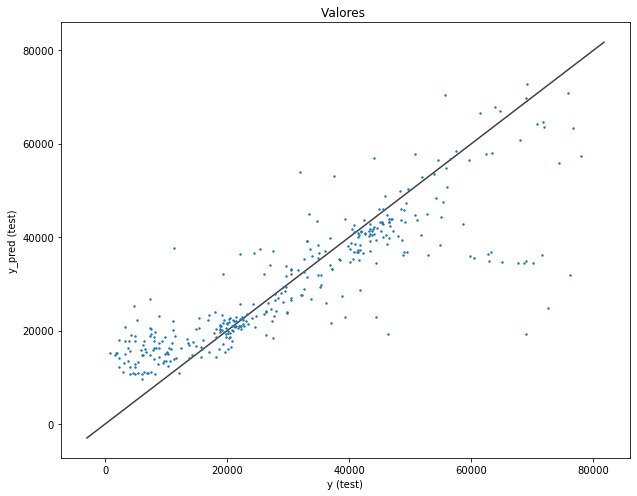

In [119]:
#Graficamos los datos
plt.figure(figsize = (17,7))

ax = plt.subplot(1,2,2)
ax.scatter(testY,testPredict, s =2)
#     ax.scatter(RMSE_test,RMSE_train, s =2)
plt.title('Valores ')
    
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [120]:
# Obtenemos los resultados con las métricas elegidas
trainScore = mean_squared_error(trainY[0], trainPredict[:,0],squared=False)
print('Resultado del entrenamiento: %.2f RMSE' % (trainScore))
testScore = mean_squared_error(testY[0], testPredict[:,0], squared=False)
print('Resultado del test: %.2f RMSE' % (testScore),'\n')
      
# MAE
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Resultado del entrenamiento: %.2f MAE' % (trainScore))
testScore =mean_absolute_error(testY[0], testPredict[:,0])
print('Resultado del test: %.2f MAE' % (testScore),'\n')

# R2
trainScore = r2_score(trainY[0], trainPredict[:,0])
print('Resultado del entrenamiento: %.2f R2' % (trainScore))
testScore =r2_score(testY[0], testPredict[:,0])
print('Resultado del test: %.2f R2' % (testScore))


Resultado del entrenamiento: 4576.50 RMSE
Resultado del test: 9907.08 RMSE 

Resultado del entrenamiento: 3159.32 MAE
Resultado del test: 6507.55 MAE 

Resultado del entrenamiento: 0.68 R2
Resultado del test: 0.72 R2


In [121]:
# Modificamos los conjuntos de set y entranamiento para poder graficarlos
#Train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Test
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

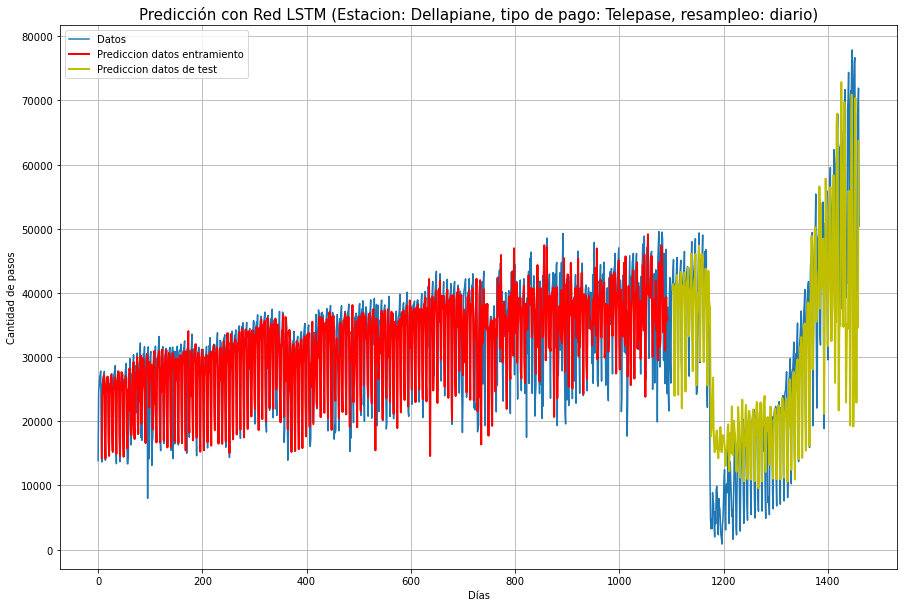

In [125]:
# Graficamos las predicciones vs nuestra serie
plt.figure(figsize = (15,10))
plt.plot(scaler.inverse_transform(dataset))
# ploteamos linea base y predicciones
plt.plot(trainPredictPlot,'r', linewidth = 2)
plt.plot(testPredictPlot,'y', linewidth = 2)
plt.legend( ('Datos', 'Prediccion datos entramiento', 'Prediccion datos de test'), loc = 'upper left')
plt.grid()
plt.title("Predicción con Red LSTM (Estacion: Dellapiane, tipo de pago: Telepase, resampleo: diario)", fontsize = 15)
plt.xlabel("Días", fontsize = 10)
plt.ylabel("Cantidad de pasos", fontsize = 10)
plt.show()


## Conclusión

De acuerdo a lo anterior podemos ver claramente que nuestro modelo de Red LSTM es muy superior a nuestro modelo de Benchmark teniendo un mejor rendimiento:
    
###### LSTM Model 
- MAE en train: 3159.32 MAE
- MAE en test: 6507.55 MAE 

###### Benchmark Model
- MAE en train: 5891.362963494591
- MAE en Test: 6756.8416179237765

Si bien, a simple vista la diferencia entre el rendimiento anterior no es mucho (principalmente en los datos de test), podemos ver claramente que las predicciones en los conjuntos de train y test mantienen la secuencia de los valores reales, donde posiblemente el error aumentó debido a los valores del primer trimestre de 2020 por la disminución exponencial en cantidad de pasos debido ala situación de la pandemia, cabe mencionar que que nuestra red entrenó 500 veces (epoch) sin detenerse ( EarlyStopping ), por lo que podría ajustarse aún mas nuestra red y tener mejor rendimiento.

Con lo anterior podemos decir que el presente modelo presenta un mejor rendimiento que el obtenido en el proyecto 3.
    
    

https://www.bbvaaifactory.com/es/improving-predictions-in-deep-learning-by-modelling-uncertainty-2/